In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [197]:
df = pd.read_csv('../../mod-2-project/data/kc_house_data_2.csv', index_col=0)

In [198]:
display(df.dtypes)
display(df.shape)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

(21534, 21)

In [199]:
df['age_home'] = 2020 - df['yr_built']

In [200]:
df.isnull().sum().sum()

0

### Correlation Analysis

In [201]:
price_corr = df.corr()['price']
top_price_corr = price_corr[abs(price_corr) > 0.50].sort_values(ascending=False)

In [202]:
top_price_corr

price            1.000000
sqft_living      0.701587
grade            0.668307
sqft_above       0.605695
sqft_living15    0.585304
bathrooms        0.525053
Name: price, dtype: float64

In [203]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    

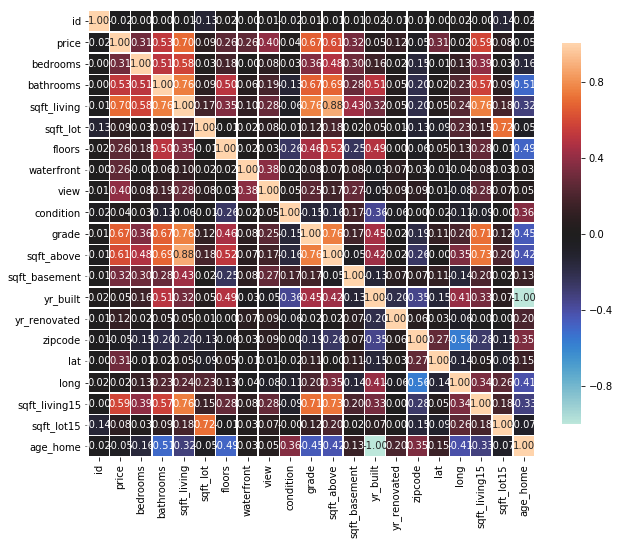

In [204]:
correlation_heatmap(df)

### Log Transformation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2aa73350>,
      dtype=object)

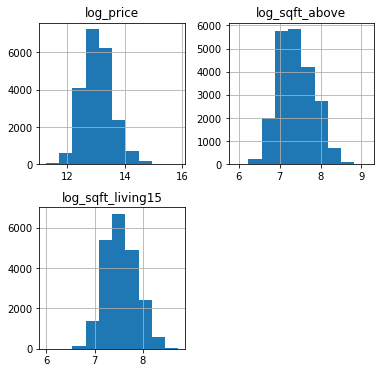

In [205]:
data_log = pd.DataFrame([])
data_log['log_price'] = np.log(df['price'])
data_log['log_sqft_above'] = np.log(df['sqft_above'])
data_log['log_sqft_living15'] = np.log(df['sqft_living15'])
data_log.hist(figsize  = [6, 6])

### Standardization 

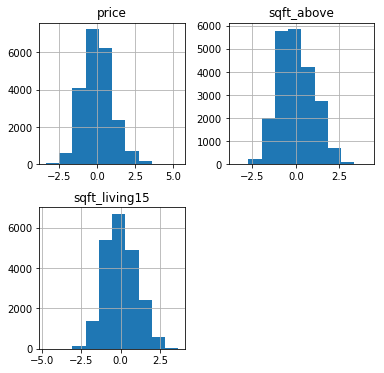

In [206]:
logprice = data_log['log_price']
logsqft_above = data_log['log_sqft_above'] 
logsqft_living15 = data_log['log_sqft_living15'] 

scaled_price = (logprice - np.mean(logprice)) / np.sqrt(np.var(logprice))
scaledsqft_above = (logsqft_above - np.mean(logsqft_above)) / np.sqrt(np.var(logsqft_above))
scaledsqft_living15 = (logsqft_living15 - np.mean(logsqft_living15)) / np.sqrt(np.var(logsqft_living15))

target = pd.DataFrame()

target['log_price'] = scaled_price
df['sqft_above_trans'] = scaledsqft_above
df['sqft_living15_trans'] = scaledsqft_living15
 
data_cont_scaled.hist(figsize = [6, 6]);

### Decomposing Categories

In [207]:
# Excluding price for encoding
x_cols = df.iloc[:, 3:]
x_cols = list(x_cols.columns.values)

In [208]:
categorical_variables = ['zipcode']

In [209]:
df_ohe = pd.get_dummies(df[x_cols], columns= categorical_variables, drop_first = True )

In [210]:
df_ohe.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,...,0,0,0,0,0,0,0,0,0,0


In [211]:
df_ohe.columns

Index([u'bedrooms', u'bathrooms', u'sqft_living', u'sqft_lot', u'floors',
       u'waterfront', u'view', u'condition', u'grade', u'sqft_above',
       u'sqft_basement', u'yr_built', u'yr_renovated', u'lat', u'long',
       u'sqft_living15', u'sqft_lot15', u'age_home', u'sqft_above_trans',
       u'sqft_living15_trans', u'zipcode_98002', u'zipcode_98003',
       u'zipcode_98004', u'zipcode_98005', u'zipcode_98006', u'zipcode_98007',
       u'zipcode_98008', u'zipcode_98010', u'zipcode_98011', u'zipcode_98014',
       u'zipcode_98019', u'zipcode_98022', u'zipcode_98023', u'zipcode_98024',
       u'zipcode_98027', u'zipcode_98028', u'zipcode_98029', u'zipcode_98030',
       u'zipcode_98031', u'zipcode_98032', u'zipcode_98033', u'zipcode_98034',
       u'zipcode_98038', u'zipcode_98039', u'zipcode_98040', u'zipcode_98042',
       u'zipcode_98045', u'zipcode_98052', u'zipcode_98053', u'zipcode_98055',
       u'zipcode_98056', u'zipcode_98058', u'zipcode_98059', u'zipcode_98065',
       u'zi

In [212]:
%store
#%store -r

Stored variables and their in-db values:


### Modeling

In [213]:
df_ohe.isnull().sum().sum()

0

In [214]:
## This time note that we are using all of the independent variables 'TV', 'Newspaper', 'Radio'
X = df_ohe.values

## Target variable (Dependent Variable) is still 'Sales' column
y = target.log_price.values

## We need to add constants for the intercept term
Xconst = sm.add_constant(X)

## Note that the rest is exactly the same with the simple linear regression
model = sm.OLS(y, Xconst, hasconst= True)
multiple_model_fitted = model.fit()
print(multiple_model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1838.
Date:                Sat, 28 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:27:01   Log-Likelihood:                -7568.3
No. Observations:               21534   AIC:                         1.531e+04
Df Residuals:                   21446   BIC:                         1.601e+04
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.052e-05   6.47e-06     -9.355      0.0